# Jennifer Danielson Notebook - Intro to Jupyter and Exploratory Data Analysis (EDA)

- Author: [Jennifer Danielson](https://github.com/jmdanielson82)
- Repository: [datafun-04-notebooks](https://github.com/jmdanielson82/datafun-04-notebooks)
- Purpose: To perform exploratory data analysis (EDA) on the Titanic dataset to understand passenger demographics and factors related to survival.
- Date: 02-03-2026

## Dataset Information

- Dataset: Titanic
- Description: Passenger information including demographics, ticket class, and survival outcomes.
- Source: Seaborn built-in datasets
- Original Collection: Historical Titanic passenger records (compiled for educational use)  
- Citation: Titanic dataset, popularized via Kaggle and included in Seaborn
- Access: Available via Seaborn's built-in datasets

## Section 1. Titanic Data Imports

In [92]:

# Imports at the top of the file
# REQ.EXTERNAL.DEPS: External packages must be defined in pyproject.toml
# REQ.EXTERNAL.DEPS.INSTALLED: external packages must be installed in the environment using uv sync command
# REQ.EXTERNAL.DEPS.IMPORTED: external packages used in this notebook must be imported here


from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

print("Imports complete for Titanic EDA.")

Imports complete for Titanic EDA.


## Section 2. Load the Titanic Data

In [93]:

df = sns.load_dataset("titanic")
df.head()

# Preview the first few rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 3. Inspect Data Shape and Structure

WHY: First, understand the shape (basic structure) of the data:

- How many rows and columns are there?
- What types of data are present?
- Are there obvious missing values?

This step determines challenges we might have downstream (later).

In [94]:

# Get shape - number of rows and columns
shape: tuple[int, int] = df.shape

# Communicate the shape clearly
print(f"The Titanic dataset has {shape[0]} rows and {shape[1]} columns.")

The Titanic dataset has 891 rows and 15 columns.


In [95]:
# Section 3 Python cell

# Display column names and data types
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


In [96]:
# Section 3 Python cell

# List the column names
print("Column names:")
print(list(df.columns))

Column names:
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


The Titanic dataset contains a mix of numerical and categorical variables.
Several columns, such as age, have missing values, which may require consideration
in later stages of the analysis.

## Section 4. Create Data Dictionary and Check Data Quality

WHY: Missing data is normal. We need to find out how much and where.

Missing data affects:

- Visualizations
- Summary statistics
- Machine learning models

LOOK FOR: 

- Columns with many missing values
- Patterns (entire rows missing multiple fields)

In [97]:
# Section 4 Python cell

# Count missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [98]:
# Section 4 Python cell

# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 107


The dataset contains missing values in several columns, most notably age and deck.
There are 107 duplicate rows in the dataset which is expected considering multiple passengers may share the same feature values across all recorded variables.

## Section 5. Create Clean View for EDA

WHY: We often want to work with complete data for visualizations and statistics.

Strategy:
- Keep the original DataFrame unchanged
- Create a separate clean view by dropping rows with missing values

In [99]:
# Section 5 Python cell

# Create a clean view by dropping rows with any missing values
#(limit to columns commonly used in EDA)
df_clean: pd.DataFrame = df.dropna(
    subset=["age", "fare", "sex", "class", "survived"]
)

# Compare sizes
print(f"Original dataset: {len(df)} rows")
print(f"Clean dataset: {len(df_clean)} rows")
print(f"Rows removed: {len(df) - len(df_clean)}")


Original dataset: 891 rows
Clean dataset: 714 rows
Rows removed: 177


After removing rows with missing values in key variables, the cleaned dataset contains 714 rows compared to the original 891 rows. 177 rows were removed due to missing data. This reduction highlights the impact of missing values, particularly in the age variable, and justifies the use of a clean view for clearer analysis.

## Section 6. Descriptive Statistics for Numeric Columns

WHY: Summary statistics give us a quick overview of the numeric data:

- Central tendency (mean)
- Spread (std, min, max)
- Distribution shape (quartiles)


In [100]:
# Section 6 Python cell

# Summary statistics for numeric columns
df_clean.describe()

,survived,pclass,age,sibsp,parch,fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [101]:
# Section 6 Python cell

# AND/OR Calculate statistics for a specific column with numpy
# Section 6 Python cell

# AND/OR Calculate statistics for a specific column with numpy
mean_fare = np.mean(df_clean["fare"])
std_fare = np.std(df_clean["fare"])
min_fare = np.min(df_clean["fare"])
max_fare = np.max(df_clean["fare"])
range_fare = np.ptp(df_clean["fare"])  # peak to peak (max - min)

print("Fare Statistics (using numpy):")
print(f" Mean: {mean_fare:.2f}")
print(f" Std Dev: {std_fare:.2f}")
print(f" Min: {min_fare:.2f}")
print(f" Max: {max_fare:.2f}")
print(f" Range: {range_fare:.2f}")

Fare Statistics (using numpy):
 Mean: 34.69
 Std Dev: 52.88
 Min: 0.00
 Max: 512.33
 Range: 512.33


The summary statistics indicate that fare values vary widely among passengers. The relatively large standard deviation and range suggest a right-skewed distribution, with most passengers paying lower fares and a smaller number paying much higher prices.

## Section 7. Correlation Matrix for Numeric Columns

WHY: Correlation tells us how numeric variables relate to each other.

- Values near 1 or -1 indicate strong relationships
- Values near 0 indicate weak or no linear relationship



In [102]:
# Section 7 Python cell

# Select only numeric columns and compute correlation
numeric_cols = df_clean.select_dtypes(include="number")
correlation_matrix = numeric_cols.corr()
print(correlation_matrix)

          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.359653 -0.077221 -0.017358  0.093317  0.268189
pclass   -0.359653  1.000000 -0.369226  0.067247  0.025683 -0.554182
age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
sibsp    -0.017358  0.067247 -0.308247  1.000000  0.383820  0.138329
parch     0.093317  0.025683 -0.189119  0.383820  1.000000  0.205119
fare      0.268189 -0.554182  0.096067  0.138329  0.205119  1.000000


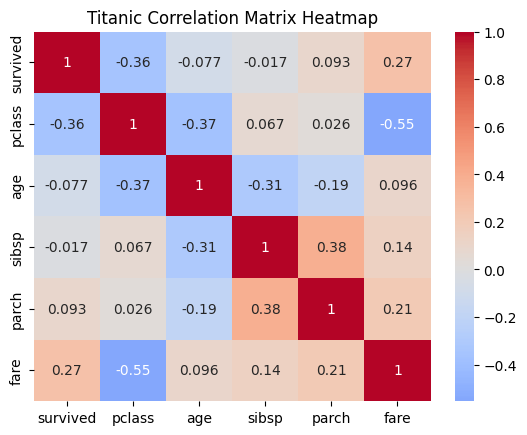

In [103]:
# Section 7 Python cell

# Visualize the correlation matrix as a heatmap
# Set annotations to True to show correlation values

# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Titanic Correlation Matrix Heatmap")
plt.show()


### Interpretation

The correlation matrix shows a strong negative relationship between passenger class (`pclass`)
and fare, indicating that passengers in higher classes generally paid higher fares.
Other variables, such as age, show relatively weak correlations with most numeric features,
suggesting limited linear relationships among these variables.
 

 - Values close to 1 (dark red) = strong positive correlation (both increase together)
 - Values close to -1 (dark blue) = strong negative correlation (one increases, other decreases)
 - Values close to 0 (white) = little or no linear relationship
 - The diagonal is always 1 (each variable correlates perfectly with itself)

## Section 8. Make Plots

WHY: Visualizations reveal patterns not obvious in tables.

Create:
1. A scatter plot to see relationships between two variables
2. A box plot to compare distributions across groups


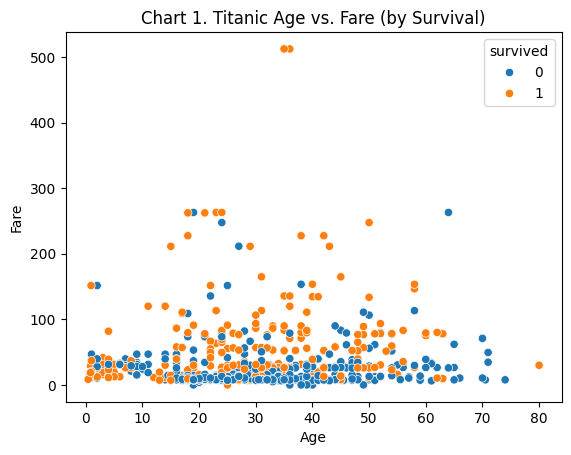

In [104]:
# Section 8 Python cell - use "Run All" so prior cells are executed first.

# Create a scatter plot of Titanic age vs. fare
# We need to know our dataset column names so we can use them to set x, y, and hue (color)
scatter_plt: Axes = sns.scatterplot(
    data=df_clean, x="age", y="fare", hue="survived"
)

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Age")
scatter_plt.set_ylabel("Fare")

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 1. Titanic Age vs. Fare (by Survival)")

# Run by clicking Run All in the Menu up top
plt.show()

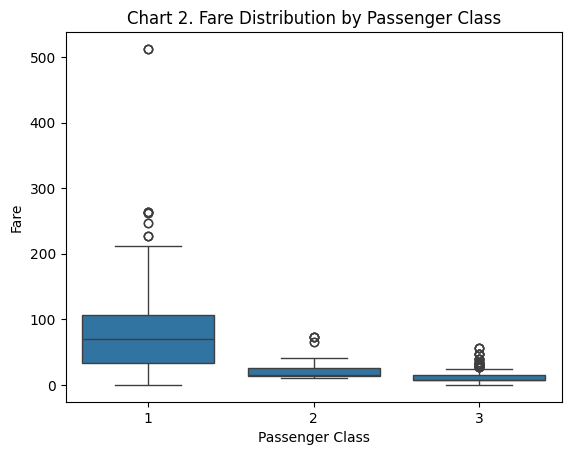

In [105]:
# Section 8 Python cell

# Create a box plot to compare fare distributions across passenger classes
box_plt: Axes = sns.boxplot(
    data=df_clean, x="pclass", y="fare"
)

box_plt.set_xlabel("Passenger Class")
box_plt.set_ylabel("Fare")

box_plt.set_title("Chart 2. Fare Distribution by Passenger Class")

plt.show()


The scatter plot shows how fare varies by age, with survival status highlighted to help spot patterns between ticket price and survival. The box plot shows that fare differs substantially by passenger class, with higher classes generally paying higher fares and more high-fare outliers.

## Section 9. Reminder: Run All before sending to GitHub

Before saving a notebook (and running git add-commit-push), click 'Run All' to generate all outputs and display them in the notebook. 
